# Superconductivity

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [31]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [2]:
# Usefull paths
data_dir = Path('Data')
figures_dir = Path('Figures')

In [6]:
# Load data
imanes = pd.read_csv(data_dir / 'imanes.txt', sep=',')
critical = pd.read_csv(data_dir / 'PuntoCritico1.txt', sep='\t', decimal=',')

In [12]:
imanes.columns = imanes.columns.str.strip()
imanes

,Bi,Y
0,5.326,5.885
1,5.176,5.738
2,5.196,5.933
3,5.095,


In [19]:
time, volt, temp = critical.columns
critical.head()

,t / s,U_B1 / V,Temp / K
0,0.0,0.829,282.3
1,0.5,0.828,282.2
2,1.0,0.827,281.9
3,1.5,0.827,281.6
4,2.0,0.826,281.3


## Plot

In [75]:
volt_threshold = 0.005
critical_times = critical[critical[volt]<=volt_threshold].iloc[[0, -1]][time].values
critical_temps = critical[critical[volt]<=volt_threshold].iloc[[0, -1]][temp].values

In [77]:
critical_temps.mean(), critical_temps.std()

(108.95, 0.45000000000000284)

### Voltage and temperature over time

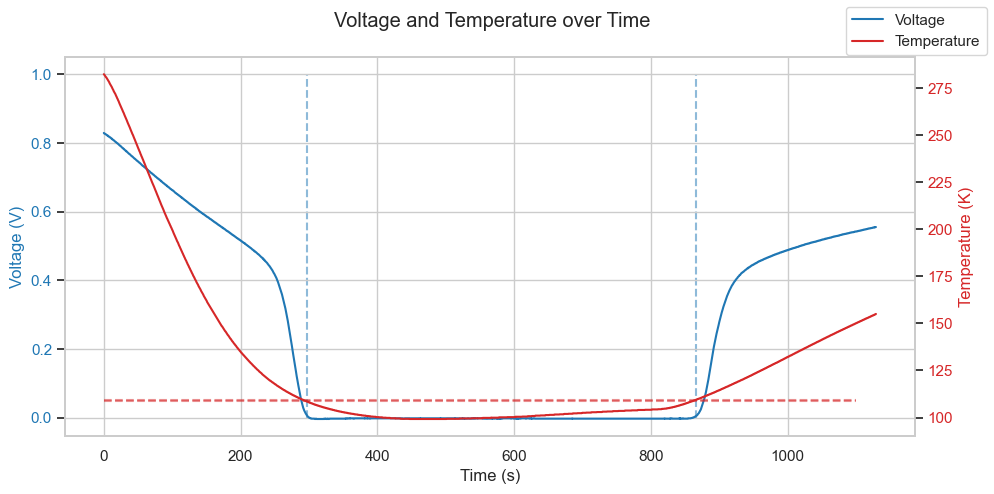

In [93]:
sns.set_theme(style='whitegrid')

fig, ax1 = plt.subplots(figsize=(10, 5))

color = 'tab:blue'
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Voltage (V)', color=color)
ax1.plot(critical[time], critical[volt], color=color, label='Voltage', zorder=1)
# ax1.errorbar(critical[time], critical[volt], yerr=0.002, fmt='.', color=color, alpha=0.5)
ax1.tick_params(axis='y', labelcolor=color)

ax1.vlines(x=critical_times, ymin=0, ymax=1, color=color, linestyle='--', alpha=0.5, zorder=-1)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Temperature (K)', color=color)
ax2.plot(critical[time], critical[temp], color=color, label='Temperature', zorder=1)
ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(False)

ax2.hlines(y=critical_temps, xmin=0, xmax=1.1e3, color=color, linestyle='--', alpha=0.5, zorder=-1)

fig.suptitle('Voltage and Temperature over Time')
fig.legend(loc='upper right')
fig.tight_layout()

# plt.savefig(figures_dir / 'voltage_temperature_time.pdf')

### Voltage over temperature

In [99]:
temp_decreasing = critical[critical[temp].diff() < 0]
temp_increasing = critical[critical[temp].diff() > 0]

Text(0.5, 0.98, 'Voltage over Temperature')

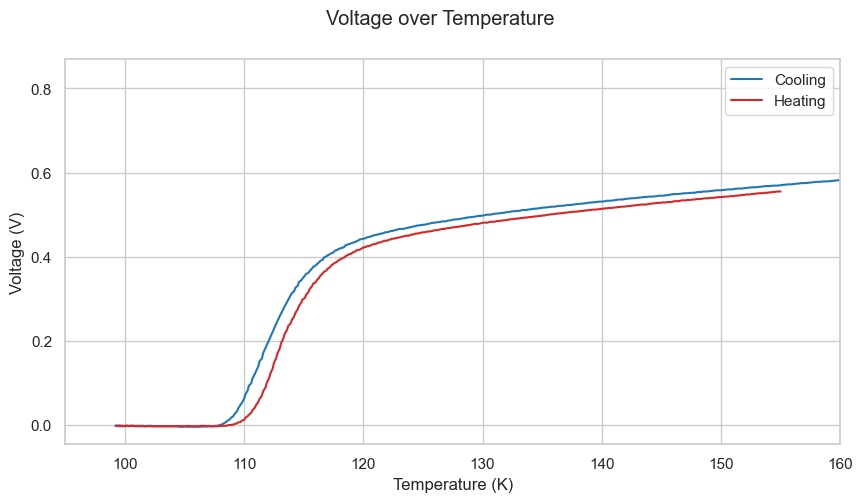

In [107]:
sns.set_theme(style='whitegrid')

fig, ax = plt.subplots(figsize=(10, 5))

ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Voltage (V)')
ax.plot(temp_decreasing[temp], temp_decreasing[volt], color='tab:blue', zorder=1, label='Cooling')
ax.plot(temp_increasing[temp], temp_increasing[volt], color='tab:red', zorder=1, label='Heating')

ax.set_xlim(95, 160)
ax.legend()

fig.suptitle('Voltage over Temperature')